Load the data

In [31]:
# Hide warnings if there are any
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%load_ext sql
%load_ext cython
%load_ext rpy2.ipython

# We need ggplot2%%
%R library(ggplot2)

# Load in the pandas library
import pandas as pd
from rpy2.robjects import pandas2ri, r

df = pd.read_csv('ted_main.csv')

pandas2ri.activate()

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
The cython extension is already loaded. To reload it, use:
  %reload_ext cython
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Display some things in R

In [11]:
%%R -i df
names(df)

 [1] "comments"           "description"        "duration"          
 [4] "event"              "film_date"          "languages"         
 [7] "main_speaker"       "name"               "num_speaker"       
[10] "published_date"     "ratings"            "related_talks"     
[13] "speaker_occupation" "tags"               "title"             
[16] "url"                "views"             


General positive trend: more languages = more views.

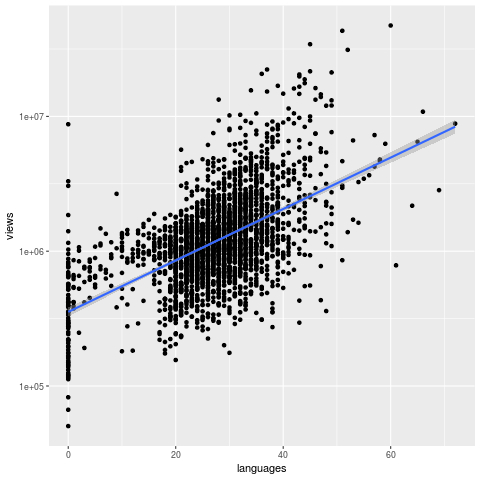

In [26]:
%%R
ggplot(aes(x=languages,y=views),data=df)+
    geom_point(stat="identity")+
    scale_y_log10()+
    geom_smooth(method='lm')

Same with comments

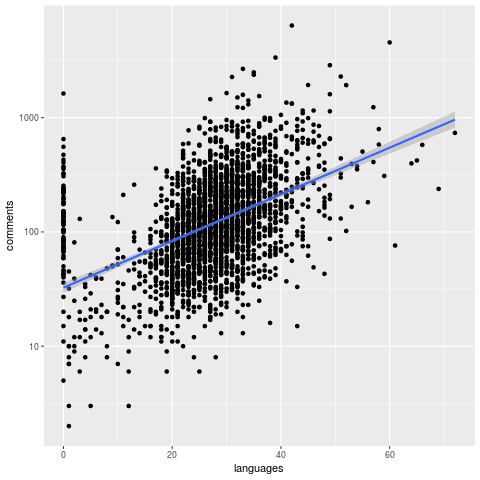

In [27]:
%%R
ggplot(aes(x=languages,y=comments),data=df)+
    geom_point(stat="identity")+
    scale_y_log10()+
    geom_smooth(method='lm')

Refactor ratings

In [ ]:
df$ratingScore <- df$ratings

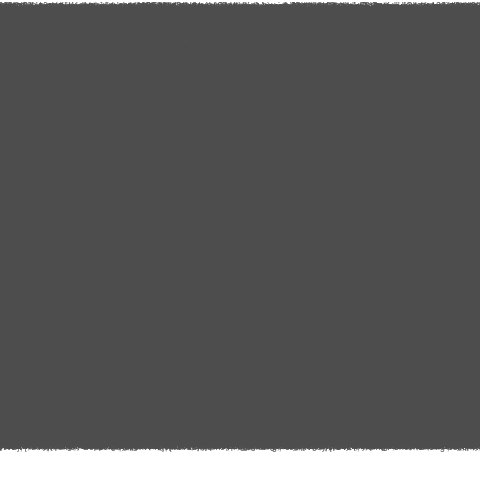

In [30]:
%%R
ggplot(aes(x=languages,y=ratings),data=df)+
    geom_point(stat="identity")+
    geom_smooth(method='lm')

In [33]:
%%R
summary(df$ratings)

                          [{'id': 10, 'name': 'Inspiring', 'count': 100}, {'id': 8, 'name': 'Informative', 'count': 248}, {'id': 7, 'name': 'Funny', 'count': 68}, {'id': 24, 'name': 'Persuasive', 'count': 160}, {'id': 3, 'name': 'Courageous', 'count': 18}, {'id': 1, 'name': 'Beautiful', 'count': 45}, {'id': 22, 'name': 'Fascinating', 'count': 79}, {'id': 21, 'name': 'Unconvincing', 'count': 10}, {'id': 25, 'name': 'OK', 'count': 40}, {'id': 9, 'name': 'Ingenious', 'count': 5}, {'id': 11, 'name': 'Longwinded', 'count': 3}, {'id': 23, 'name': 'Jaw-dropping', 'count': 8}, {'id': 26, 'name': 'Obnoxious', 'count': 4}, {'id': 2, 'name': 'Confusing', 'count': 0}] 
                                                                                                                                                                                                                                                                                                                                              

In [47]:
%%R
summary(subset(df$ratings,name=='Informative'&count==248))


Error while parsing the string.
